In [18]:
import numpy as np

import mlgrad.model as model
import mlgrad.dissimilarity as dissimilarity
import mlgrad.func as func
import mlgrad.loss as loss
import mlgrad.avragg as avragg
import mlgrad.pbsag as pbsag

import sklearn.linear_model as sklm

import matplotlib.pyplot as plt
plt.style.use(["seaborn-paper", "seaborn-white"])
#mpl.style.available

In [3]:
lm_orig = model.LinearModel([0.5,3.0])
lm_orig

In [4]:
def generate_dataset(ratio):
    N = 100
    m = int(ratio * N)
    h = 2.0 / N
    X1 = 2*np.random.random((N,1))-1
    X1 *= 1.5
    Y1 = lm_orig.evaluate_all(X1)
    dY1 = 2*np.random.random((N,))-1
    Y1 += dY1

    X2 = 2*np.random.random((m,1)) + 0.8
    Y2 = np.random.random((m,)) - 5

    X = np.concatenate((X1, X2))
    Y = np.concatenate((Y1, Y2))
    return X, Y

xs = np.arange(-1.5, 2.5, 0.25).reshape(-1,1)

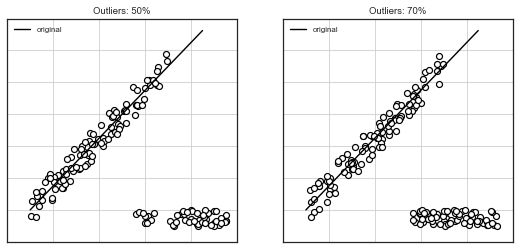

In [12]:
plt.figure(figsize=(14.0, 4.0))
for i, ratio in enumerate([0.5, 0.7]):
    plt.subplot(1,3,i+1)
    plt.title("Outliers: %s%%" % int(ratio*100))
    X, Y = generate_dataset(ratio)

    #sklm_failed = sklm.LinearRegression()
    #sklm_failed.fit(X.reshape(-1,1),Y)

    plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=1.2)
    plt.plot(xs, lm_orig.evaluate_all(xs), c='k', label='original')
    #plt.plot(xs, sklm_failed.predict(xs), label='failed', marker='v', markersize=8)
    plt.grid(1)
    plt.minorticks_on()
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.legend(loc='best')
#plt.tight_layout()
plt.show()

In [22]:
loss_func = loss.Loss(func.Square())
loss_func

K: 6428 [ 0.37844599  2.90433062]
K: 7666 [ 0.4371816   2.90349102]


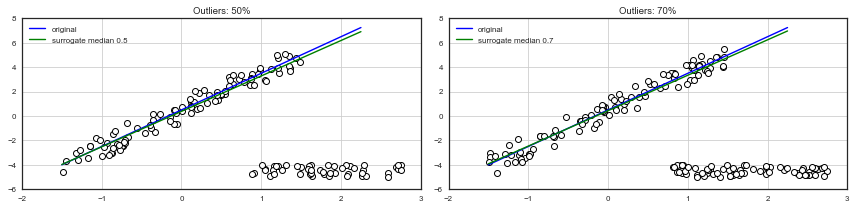

In [34]:
plt.figure(figsize=(12.0, 3.0))
for i, ratio in enumerate([0.5, 0.7]):
    plt.subplot(1,2,i+1)
    plt.title("Outliers: %s%%" % int(ratio*100))
    X, Y = generate_dataset(ratio)
    
    param_init = np.array([0.1, -1.1])
    lm_learn = model.LinearModel(param_init)
    quantile_func = func.Quantile_AlphaLog(0.01, 1.0/(1.+ratio))
    penalty_func = dissimilarity.Dissimilarity(quantile_func)
    alg = pbsag.PbSAG(lm_learn, loss_func, penalty_func,  h=0.002, tol=1.0e-5, n_iter=10000)
    alg.fit(X, Y)
    print("K:", alg.K, lm_learn.param.base)

    plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidth=1.0)
    plt.plot(xs, lm_orig.evaluate_all(xs), label='original') #, marker='o', markersize=6)
    plt.plot(xs, lm_learn.evaluate_all(xs), label='surrogate median %s' % ratio) #, marker='s', markersize=6)
    plt.grid(1)
    plt.minorticks_on()
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
lm_learn

In [9]:
huber_loss = func.Huber()
huber_loss

In [10]:
param_init = 2*np.random.random((2,))-1
lm_learn_huber = model.LinearModel(param_init)

alg_huber = sag.SAG(lm_learn_huber, huber_loss, h=0.001, tol=1.0e-4, n_iter=5000)
alg_huber.fit(X, Y)
print("K:", alg_huber.K, "h:", alg_huber.h_mean)

K: 98 h: 0.001


In [11]:
lm_learn_huber

In [12]:
#ransac = lm.RANSACRegressor()
#ransac.fit(X, Y)
lsm = sklm.LinearRegression()
lsm.fit(X, Y)
#theil = lm.TheilSenRegressor()
#theil.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

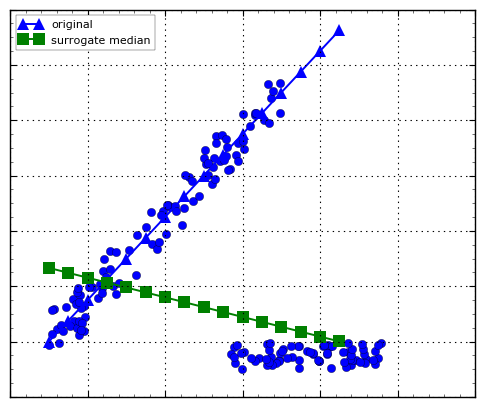

In [13]:
plt.figure(figsize=(6.0, 5.0))
plt.scatter(X, Y, s=36)
plt.plot(xs, lm_orig.evaluate_all(xs), label='original', marker='^', markersize=8)
plt.plot(xs, lm_learn_huber.evaluate_all(xs), label="surrogate median", marker='s', markersize=8)
plt.legend(loc='best')
plt.grid(1)
plt.minorticks_on()
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()